In [202]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import random
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [176]:
x = []
A = []
data_path=r'C:\Users\Rohit Varre\Desktop\Project Spidy'
categories=os.listdir(data_path)
for folder in categories:
    if folder == 'curve_new':
        folder_path=os.path.join(data_path,folder)
        data=os.listdir(folder_path)
        n = len(data)
        for dat in data:
            A.append(dat)
            temp_path = os.path.join(folder_path,dat)
            temp = pd.read_csv(temp_path,header=None)
            temp.drop([0,3],inplace = True)
            x.append(list(temp[0].values))

In [177]:
X = list(map(list, zip(A, x)))
print(len(X),len(X[0]))
print(X[1])

59262 2
['curve_100.csv', [0.076026, 0.68921, 1.3987, 1.3375, 1.3671, 0.52623]]


In [178]:
B = pd.read_excel(r'C:\Users\Rohit Varre\Desktop\Project Spidy\Center.xlsx')
B = list(B['name'])

In [179]:
for i in range(0,len(B)):
    temp = B[i]
    B[i] = int(temp[7:-4])
B.sort()
print(B)

[2, 7, 8, 11, 14, 15, 17, 21, 22, 25, 27, 31, 32, 38, 40, 42, 47, 48, 51, 53, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 72, 75, 76, 82, 87, 88, 94, 95, 99, 101, 102, 103, 107, 111, 112, 113, 115, 117, 123, 126, 127, 132, 139, 140, 141, 142, 144, 152, 156, 157, 169, 173, 176, 178, 182, 185, 186, 190, 196, 197, 201, 203, 205, 206, 213, 218, 222, 223, 226, 229, 230, 234, 236, 238, 239, 241, 242, 243, 246, 247, 248, 256, 257, 258, 261, 271, 272, 277, 279, 282, 283, 284, 286, 291, 294, 295, 296, 297, 299, 303, 306, 310, 311, 319, 325, 331, 333, 334, 335, 340, 344, 346, 347, 349, 350, 356, 361, 365, 367, 368, 371, 374, 377, 378, 382, 385, 387, 388, 391, 395, 396, 398, 405, 408, 414, 415, 416, 417, 418, 419, 425, 427, 430, 431, 432, 433, 434, 436, 442, 452, 453, 457, 458, 461, 462, 463, 466, 468, 469, 471, 476, 477, 478, 479, 482, 484, 486, 487, 488, 489, 495, 501, 502, 503, 504, 507, 509, 511, 513, 519, 520, 522, 524, 531, 533, 534, 535, 537, 538, 541, 544, 546, 549, 550, 555, 556,

In [180]:
for i in range(0,len(X)):
    temp = X[i][0]
    X[i][0] = int(temp[6:-4])
print(X[0])

[10, [0.37915, 0.88986, 1.1051, 1.965, 1.726, 0.41166]]


In [181]:
X.sort(key = lambda x:x[0])

In [182]:
print(X[0])

[2, [0.02932, 0.91422, 1.4376, 1.7996, 0.32543, 0.55429]]


In [185]:
Labels = []
j = 0
for k in range(0,len(X)):
    i =  X[k][0]
    if i<b[j]:
        Labels.append(0)
    if i == b[j]:
        Labels.append(1)
        j = j+1
print(len(Labels))

59262


In [186]:
Features = []
for i in range(0,len(X)):
    Features.append(X[i][1])
print(len(Features[0]))

6


In [194]:
labels = np.array(Labels)
features = np.array(Features)
labels = labels.reshape([-1,1])
print(labels.shape)
print(features.shape)

(59262, 1)
(59262, 6)


In [268]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels)
print(labels)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [269]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.2)

In [270]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(47409, 6)
(47409, 2)
(11853, 6)
(11853, 2)


In [276]:
model = Sequential([
    
    Dense(units = 12, input_shape = (6,), activation = 'relu'),
    Dropout(0.2),
    Dense(units = 24, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 48, activation = 'relu'),
    Dense(units = 48, activation = 'relu'),
    Dense(units = 48, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dense(units = 12, activation = 'softmax'),
    Dense(units = 2)
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 12)                84        
_________________________________________________________________
dropout_16 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_17 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 48)                1200      
_________________________________________________________________
dense_79 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_80 (Dense)             (None, 48)              

In [277]:
model.compile(optimizer=Adam(lr = 0.1), loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x=x_train,y=y_train,epochs=30,verbose=2,validation_split=0.2,batch_size=128)

Epoch 1/30
297/297 - 1s - loss: 3.3310 - accuracy: 0.6119 - val_loss: 3.3425 - val_accuracy: 0.6116
Epoch 2/30
297/297 - 0s - loss: 3.3297 - accuracy: 0.6119 - val_loss: 3.3297 - val_accuracy: 0.6116
Epoch 3/30
297/297 - 0s - loss: 3.3292 - accuracy: 0.6119 - val_loss: 3.3575 - val_accuracy: 0.6116
Epoch 4/30
297/297 - 0s - loss: 3.3313 - accuracy: 0.6119 - val_loss: 3.3417 - val_accuracy: 0.6116
Epoch 5/30
297/297 - 0s - loss: 3.3305 - accuracy: 0.6119 - val_loss: 3.3297 - val_accuracy: 0.6116
Epoch 6/30
297/297 - 0s - loss: 3.3307 - accuracy: 0.6119 - val_loss: 3.3310 - val_accuracy: 0.6116
Epoch 7/30
297/297 - 0s - loss: 3.3312 - accuracy: 0.6119 - val_loss: 3.3301 - val_accuracy: 0.6116
Epoch 8/30
297/297 - 0s - loss: 3.3295 - accuracy: 0.6119 - val_loss: 3.3503 - val_accuracy: 0.6116
Epoch 9/30
297/297 - 0s - loss: 3.3312 - accuracy: 0.6119 - val_loss: 3.3417 - val_accuracy: 0.6116
Epoch 10/30
297/297 - 0s - loss: 3.3302 - accuracy: 0.6119 - val_loss: 3.3305 - val_accuracy: 0.6116

In [278]:
model.evaluate(x=x_test,y=y_test)
y_pred = model.predict(x_test)

371/371 [==============================] - 0s 648us/step - loss: 3.3375 - accuracy: 0.6107


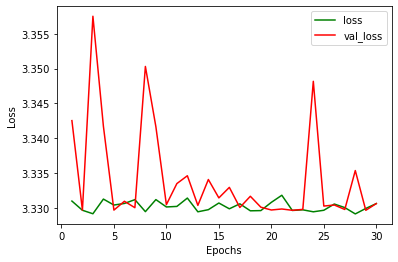

In [279]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [285]:
check = features[5]
check = check.reshape(-1,6)
pred = model.predict(check)
print(pred,labels[5])

[[ 0.6415129  -0.33385745]] [0. 1.]
